In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LassoCV
from sklearn import preprocessing

#Part A
##There are 400 observations and 100 predictors. Lasso is preferable to OLS for this question because we can include many variables, get rid of those that are not necessary, and in doing so reduce the variance of our estimates.

In [2]:
df = pd.read_csv("data/credit.csv")
gendum = pd.get_dummies(df['Gender'])
studum = pd.get_dummies(df['Student'], prefix = 'Student')
mardum = pd.get_dummies(df['Married'], prefix = 'Married')
ethdum = pd.get_dummies(df['Ethnicity'])
df = df.drop(['Unnamed: 0', 'Gender', 'Student', 'Married', 'Ethnicity'], axis = 1)
df = df.join(gendum['Male'])
df = df.join(studum['Student_Yes'])
df = df.join(mardum['Married_Yes'])
df = df.join(ethdum)
df = df[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Male', 'Student_Yes', 'African American', 'Asian', 'Balance']]

##I know this part is very messy, but I was very tired and did not want to think it through.

In [3]:
column_names = df.columns.values[1:-1] 
df_extended = df.copy() 

for column in column_names:
    interaction_name = 'Income*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Income']
    
for column in column_names:
    interaction_name = 'Limit*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Limit']
    
for column in column_names:
    interaction_name = 'Rating*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Rating']
    
for column in column_names:
    interaction_name = 'Cards*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Cards']
    
for column in column_names:
    interaction_name = 'Age*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Age']
    
for column in column_names:
    interaction_name = 'Education*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Education']
    
for column in column_names:
    interaction_name = 'Male*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Male']
    
for column in column_names:
    interaction_name = 'Student_Yes*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Student_Yes']
    
for column in column_names:
    interaction_name = 'African American*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['African American']
    
for column in column_names:
    interaction_name = 'Asian*%s'%column
    df_extended[interaction_name] = df_extended[column]*df_extended['Asian']

In [69]:
df_scaled = pd.DataFrame(preprocessing.scale(df_extended.drop(['Balance'], axis = 1)))
df_scaled = df_scaled.join(df_extended['Balance'])

#Part B

In [54]:
lasso = Lasso(alpha=.5)
X = df_scaled.drop(['Balance'], axis=1)
Y = df_scaled['Balance']
lasso.fit(X, Y)
print(lasso.coef_)
print(lasso.intercept_)

[-2.65741707e+01  1.06596046e+02  9.04886999e+01  1.72726730e+01
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.84457841e+01
 -2.40055803e+00  8.41117530e-03 -3.53058604e+02 -5.18507177e+01
 -2.99152010e+01 -0.00000000e+00 -5.51018369e+01  5.56919553e+00
 -3.14055562e+01 -4.92333251e+00 -0.00000000e+00  6.01584494e+02
  0.00000000e+00  3.26209537e+01 -0.00000000e+00  3.13445404e+01
 -4.60029968e+00  1.19110692e+02  5.47647393e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.09318214e+00 -6.87358663e+00
  5.65228690e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  2.57207101e-01  3.05955619e+00
 -0.00000000e+00 -0.00000000e+00 -4.32239704e+00  2.42436155e+00
 -0.00000000e+00 -1.51089254e+00 -0.00000000e+00 -1.31959947e+01
 -0.00000000e+00 -0.00000000e+00 -2.58641526e+00 -6.83744481e-01
  1.65431553e+00 -0.00000000e+00  3.63946979e+00  0.00000000e+00
  1.86571097e+00 -0.00000000e+00 -1.24803054e+00 -6.54068518e+00
  6.49032626e+00  0.00000

#Part C
##The training MSE is 3450.3270422189776

In [83]:
fitted_y = lasso.predict(X)
print mean_squared_error(Y, fitted_y)

3450.3270422189776


#Part D
##The CV MSE is 4502.67187929962

In [56]:
CVn = []
for i in range(5):
    start_index = (400/5)*i
    end_index = (400/5)*(i+1)
    
    X_test = X[start_index:end_index]
    Y_test = Y[start_index:end_index]
    
    X_train = np.concatenate((X[0:start_index],X[end_index:]))
    Y_train = np.concatenate((Y[0:start_index],Y[end_index:]))
    
    l = Lasso(alpha=.5)
    l.fit(X_train,Y_train)
    fitted_Y = l.predict(X_test)
    mse = mean_squared_error(Y_test, fitted_Y)
    CVn.append(mse)

    print 'Fold %s, Coefficients: %s, Intercept: %s , MSE: %s \n'%(i, l.coef_, 
                                                                   l.intercept_, mse)


print 'The CV MSE is ' + str(sum(CVn)/float(len(CVn)))

Fold 0, Coefficients: [-4.97984385e+01  1.22603226e+02  8.46360972e+01  2.09071115e+01
  0.00000000e+00  0.00000000e+00  4.15562171e+00  3.96262334e+01
 -0.00000000e+00  2.55304117e-01 -3.52883885e+02 -1.95373780e+01
 -3.44054184e+01 -0.00000000e+00 -4.27161233e+01  2.88475897e+00
 -3.35862610e+01 -1.29188240e+00 -1.92410361e+00  5.81143754e+02
  0.00000000e+00  3.87370205e+01 -0.00000000e+00  1.78406872e+01
 -4.56689012e+00  1.24614712e+02  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.27881046e+01
  5.37747569e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -8.22009663e+00  1.93078173e+00
 -2.78814725e+00 -6.98951960e-01 -9.24764973e+00 -1.85806964e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.33977105e+00
  0.00000000e+00 -0.00000000e+00  5.57945926e+00  6.28120489e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -7.55685794e+00
  7

#Part E
##The CV MSE is much higher than the training MSE. This is due to the training MSE being calculated over observations that are in the model, whereas the CV MSE is calculated using observations that were not used to create the model.

#Part F

In [87]:
grid = []
for i in range(1, 101):
    grid.append(float(i)/100)

In [88]:
lamb_mse = []

for lamb in grid:
    fold_mse = []
    for i in range(5):
        start_index = (400/5)*i
        end_index = (400/5)*(i+1)
    
        X_test = X[start_index:end_index]
        Y_test = Y[start_index:end_index]
    
        X_train = np.concatenate((X[0:start_index],X[end_index:]))
        Y_train = np.concatenate((Y[0:start_index],Y[end_index:]))
        
        l = Lasso(alpha=lamb)
        l.fit(X_train, Y_train)
        fitted_Y = l.predict(X_test)
        fold_mse.append(mean_squared_error(Y_test,fitted_Y))
    lamb_mse.append(sum(fold_mse)/len(fold_mse))

lambda_df = pd.DataFrame({"Grid": grid, "mse": lamb_mse})
lambda_df
print lambda_df.loc[lambda_df['mse'].idxmin()]

Grid       0.480000
mse     4501.712269
Name: 47, dtype: float64


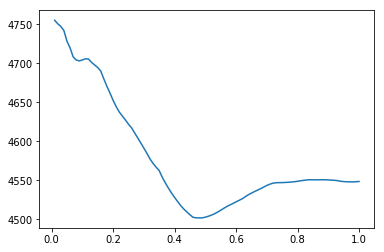

In [89]:
plt.plot(lambda_df['Grid'], lambda_df['mse'])

##The optimal value of lambda, given the grid, is .48.

#Part G
##Below is the optimal estimation.

In [82]:
lassoCorrect = Lasso(alpha=.48)
lassoCorrect.fit(X, Y)
print(lassoCorrect.coef_)
print(lassoCorrect.intercept_)

[-2.48502511e+01  1.06034809e+02  8.99887047e+01  1.74074866e+01
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.81322971e+01
 -2.50994679e+00  4.93524256e-01 -3.55287998e+02 -5.14585288e+01
 -3.02104717e+01 -0.00000000e+00 -5.60408001e+01  6.33664818e+00
 -3.16431387e+01 -5.40604132e+00 -3.58265325e-02  6.03627632e+02
  0.00000000e+00  3.26568064e+01 -0.00000000e+00  3.11985368e+01
 -5.29133827e+00  1.19313457e+02  7.78034667e-01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.07361761e+00 -7.51095625e+00
  6.28984818e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.62668463e-01  3.27837510e+00
 -0.00000000e+00 -0.00000000e+00 -4.53590695e+00  2.42123010e+00
 -0.00000000e+00 -1.50101071e+00 -0.00000000e+00 -1.30617506e+01
 -0.00000000e+00 -0.00000000e+00 -2.17037144e+00 -5.39404842e-01
  1.70308784e+00 -0.00000000e+00  3.19546849e+00  0.00000000e+00
  2.13375808e+00 -0.00000000e+00 -1.30078726e+00 -6.81821672e+00
  6.50659657e+00  0.00000